In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd

In [ ]:
def f(X):
  return X[0]**2-10*X[1]*np.cos(0.2*np.pi*X[0])+X[1]**2-15*X[0]*np.cos(0.4*np.pi*X[1])

In [ ]:
def SA(func , X_init, T_init, T_final, A, Inner_c, max_iter):
  iter=1
  X = X_init
  T = T_init
  Tested_X =X.copy()
  X_opt = X.copy()
  while T > T_final and iter < max_iter:
    c = 1
    while c <= Inner_c :
      Y=np.zeros(2)
      for i in range(len(X)):
        r=X[i]+A*(-1+2*np.random.random_sample())
        Y[i]=r
      YX=func(Y)-func(X)
      if(YX < 0):
        X = Y.copy()
        Tested_X=np.vstack((Tested_X,X))
        if(func(X) < func(X_opt)):
          X_opt = X
      else:
        p = np.random.random_sample()
        if(p <= np.exp(-YX/T)):
          X = Y
          Tested_X=np.vstack((Tested_X,X))
      c+= 1
    T = T**0.99
    iter+=1
  return X_opt, Tested_X

Res,X=SA(f,np.array([10,7]),1000,1,1.8,5,100)
print("xopt= ",Res)
print("ALL tested X : \n{}".format(X))

xopt=  [9.71344831 5.01303304]
ALL tested X : 
[[10.          7.        ]
 [ 8.20355298  5.78703602]
 [ 9.18525523  4.26668595]
 [10.81626241  2.78272769]
 [11.33600963  3.58297138]
 [12.46264599  4.38082648]
 [13.62464138  5.43967779]
 [11.9859042   6.23262287]
 [11.07492536  5.39444573]
 [12.60785283  5.63465728]
 [11.31302832  5.67602872]
 [10.02221115  4.55251367]
 [ 9.1664954   2.78568757]
 [ 9.17777129  3.95641998]
 [10.34976542  4.52437432]
 [10.42249583  4.74855806]
 [11.03228675  4.62496269]
 [ 9.36551959  4.81055656]
 [ 8.86904038  3.26293539]
 [ 9.58737151  4.54666679]
 [11.0969066   3.47423578]
 [12.70288697  4.10457659]
 [12.02347691  2.56167238]
 [10.52170261  1.25775704]
 [10.44040363 -0.39593736]
 [10.04386439  0.90408869]
 [11.62226429  1.24834923]
 [10.69451088  2.62860125]
 [ 9.94380534  1.80981536]
 [10.9754373   3.04326305]
 [10.81480238  4.60740018]
 [10.36971454  3.01250395]
 [ 8.73350702  1.28505371]
 [10.49477377  0.28958972]
 [ 9.19005962  0.71389929]
 [ 9.732

In [ ]:
f(Res)

-75.52060464297278

In [ ]:
RES=np.array([f(row) for row in X])

In [ ]:
df=pd.DataFrame(np.hstack((X,RES.reshape(len(X),1))),columns=['x1','x2','f'])
df

,x1,x2,f
0,10.000000,7.000000,200.352549
1,8.203553,5.787036,8.412212
2,9.185255,4.266686,-17.927317
3,10.816262,2.782728,252.599446
4,11.336010,3.582971,152.841831
...,...,...,...
231,9.767903,4.540755,-51.684434
232,9.541144,4.887989,-73.638328
233,9.807837,4.805489,-71.163194
234,9.250198,5.291084,-63.158575


In [ ]:
def creat_boundary(num):
  if num<-70:
    return "close"
  elif -70<num<-40:
    return "far"
  else:
    return "farther"

In [ ]:
df['f']=df['f'].apply(creat_boundary)

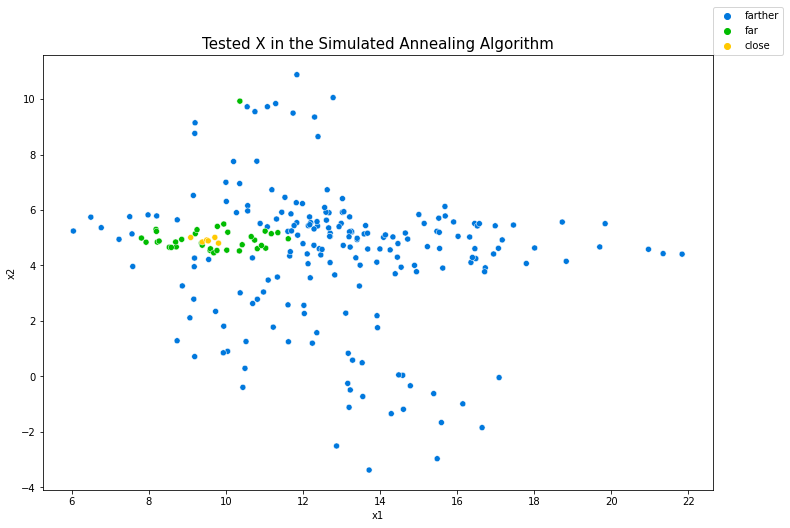

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='x1',y='x2',data=df,hue='f',palette='nipy_spectral')
plt.legend(loc=(1,1))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Tested X in the Simulated Annealing Algorithm',size=15);

In [ ]:
T_final=np.linspace(0,2,10)
A=np.linspace(0.25,2,10)
inner_c=np.linspace(1,5,5)
result=np.zeros((500,2))
f_value=np.zeros((500,1))
C=0
row=np.zeros((500,3))
for t in T_final:
  for a in A :
    for i in inner_c:
      row[C]=np.array([t,a,i])
      result[C]=SA(f,np.array([10,7]),1000,t,a,i,100)[0]
      f_value[C]=f(result[C])
      C=C+1
    

In [ ]:
df1=pd.DataFrame(np.hstack((result,f_value,row)),columns=['x1','x2','f','T','A','C'])
df1

,x1,x2,f,T,A,C
0,9.718170,6.054805,36.103311,0.0,0.25,1.0
1,9.627575,9.944990,-49.215218,0.0,0.25,2.0
2,9.084022,4.950088,-70.496164,0.0,0.25,3.0
3,9.712762,5.053780,-75.197382,0.0,0.25,4.0
4,9.877653,5.014200,-75.424894,0.0,0.25,5.0
...,...,...,...,...,...,...
495,6.511056,-0.074263,-55.273825,2.0,2.00,1.0
496,8.652555,0.300143,-47.697225,2.0,2.00,2.0
497,12.505632,5.082551,-4.173048,2.0,2.00,3.0
498,8.493533,4.873071,-58.381609,2.0,2.00,4.0


In [ ]:
df1['f']=df1['f'].apply(creat_boundary)

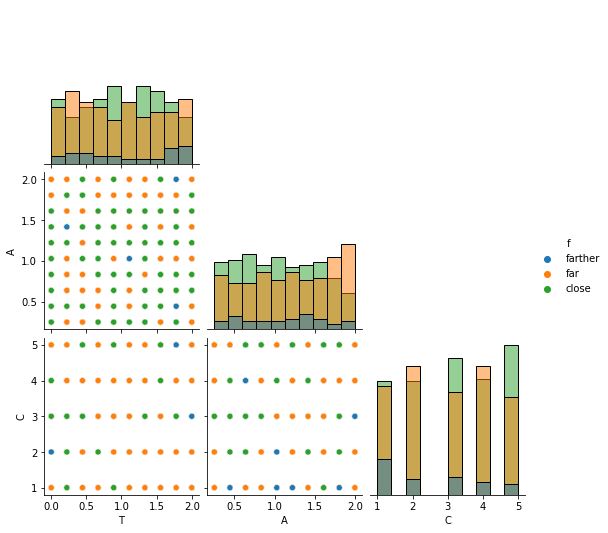

In [ ]:
sns.pairplot(df1.drop(['x1','x2'],axis=1),hue='f',corner=True,diag_kind='hist');

In [ ]:
Res,X=SA(f,np.array([10,7]),1000,0.6,0.6,5,100)

In [ ]:
f(Res)

-75.44936893837409